In [29]:
import deap as dp
import array
import random
import json
import pandas as pd
import numpy as np
%matplotlib inline
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

In [2]:
# gr*.json contains the distance map in list of list style in JSON format
# Optimal solutions are : gr17 = 2085, gr24 = 1272, gr120 = 6942
with open("gr17.json", "r") as tsp_data:
    tsp = json.load(tsp_data)

distance_map = tsp["DistanceMatrix"]
IND_SIZE = tsp["TourSize"]

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)


In [3]:
toolbox = base.Toolbox()

# Attribute generator
toolbox.register("indices", random.sample, range(IND_SIZE), IND_SIZE)

# Structure initializers
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalTSP(individual):
    distance = distance_map[individual[-1]][individual[0]]
    for gene1, gene2 in zip(individual[0:-1], individual[1:]):
        distance += distance_map[gene1][gene2]
    return distance,

toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalTSP)

In [4]:
# main() exposed

random.seed(169)

pop = toolbox.population(n=300)

hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

result_object=algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 40, stats=stats, 
                    halloffame=hof)

gen	nevals	avg   	std    	min 	max 
0  	300   	4700.7	424.386	3606	5842
1  	217   	4463.74	385.243	3587	5808
2  	225   	4364.21	416.823	3364	5513
3  	223   	4285.67	458.048	3201	5501
4  	223   	4206.02	475.679	3215	5606
5  	230   	4146.42	504.015	3150	5943
6  	247   	4123.21	513.325	3078	5652
7  	231   	4081.35	533.341	2616	5580
8  	232   	4027.11	510.98 	2616	5571
9  	214   	3978.78	525.99 	2616	5645
10 	228   	3943.08	569.815	2811	5422
11 	235   	3900.61	570.03 	2542	5524
12 	213   	3816.81	565.796	2542	5477
13 	222   	3744.63	560.789	2542	5049
14 	228   	3643.4 	559.641	2542	5217
15 	229   	3551.48	572.28 	2526	5100
16 	226   	3391.22	491.641	2505	5370
17 	236   	3253.73	496.11 	2468	5012
18 	221   	3050.2 	378.099	2412	4823
19 	215   	2918.94	328.25 	2339	4331
20 	205   	2798.48	314.093	2339	3940
21 	209   	2707.55	352.161	2276	4257
22 	216   	2568.45	321.18 	2233	4708
23 	244   	2498.27	336.388	2233	4785
24 	219   	2424.09	262.651	2228	3928
25 	231   	2406.27	326.672	2157	4838
26 

In [5]:
result_object[1][1]['std']

385.24293512881798

In [6]:
type(result_object[1][1])

dict

In [7]:
result_object[1]

[{'avg': 4700.6999999999998,
  'gen': 0,
  'max': 5842.0,
  'min': 3606.0,
  'nevals': 300,
  'std': 424.38553619713917},
 {'avg': 4463.7399999999998,
  'gen': 1,
  'max': 5808.0,
  'min': 3587.0,
  'nevals': 217,
  'std': 385.24293512881798},
 {'avg': 4364.21,
  'gen': 2,
  'max': 5513.0,
  'min': 3364.0,
  'nevals': 225,
  'std': 416.82305506453616},
 {'avg': 4285.6700000000001,
  'gen': 3,
  'max': 5501.0,
  'min': 3201.0,
  'nevals': 223,
  'std': 458.04804817107708},
 {'avg': 4206.0166666666664,
  'gen': 4,
  'max': 5606.0,
  'min': 3215.0,
  'nevals': 223,
  'std': 475.67925088469246},
 {'avg': 4146.416666666667,
  'gen': 5,
  'max': 5943.0,
  'min': 3150.0,
  'nevals': 230,
  'std': 504.01492344528407},
 {'avg': 4123.2133333333331,
  'gen': 6,
  'max': 5652.0,
  'min': 3078.0,
  'nevals': 247,
  'std': 513.32492097003126},
 {'avg': 4081.3466666666668,
  'gen': 7,
  'max': 5580.0,
  'min': 2616.0,
  'nevals': 231,
  'std': 533.34068519932816},
 {'avg': 4027.1133333333332,
  'gen'

In [8]:
df = pd.DataFrame().from_dict(result_object[1])

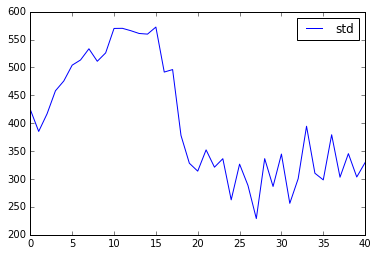

In [9]:
df.plot(y='std')

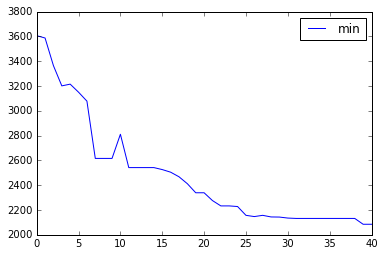

In [10]:
df.plot(y='min')

In [12]:
pop

[array('i', [7, 6, 12, 3, 0, 15, 11, 8, 4, 1, 9, 10, 14, 2, 13, 16, 5]),
 array('i', [7, 6, 12, 3, 0, 15, 11, 8, 4, 1, 9, 10, 14, 2, 13, 16, 5]),
 array('i', [7, 6, 12, 3, 0, 15, 11, 8, 4, 1, 9, 10, 14, 2, 13, 16, 5]),
 array('i', [7, 6, 12, 3, 0, 15, 11, 8, 4, 1, 9, 10, 14, 2, 13, 16, 5]),
 array('i', [7, 6, 12, 3, 0, 15, 11, 8, 4, 1, 9, 10, 14, 2, 13, 16, 5]),
 array('i', [7, 6, 12, 3, 0, 15, 11, 8, 4, 1, 9, 10, 14, 2, 13, 16, 5]),
 array('i', [7, 6, 12, 3, 0, 15, 11, 8, 4, 1, 9, 10, 14, 2, 13, 16, 5]),
 array('i', [7, 6, 12, 3, 0, 15, 11, 8, 4, 1, 9, 10, 14, 2, 13, 16, 5]),
 array('i', [7, 6, 12, 3, 0, 15, 11, 8, 4, 1, 9, 10, 14, 2, 13, 16, 5]),
 array('i', [7, 6, 12, 3, 0, 15, 11, 8, 4, 1, 9, 10, 14, 2, 13, 16, 5]),
 array('i', [12, 6, 0, 3, 7, 15, 11, 8, 4, 1, 9, 10, 16, 2, 13, 14, 5]),
 array('i', [7, 6, 12, 3, 0, 15, 11, 8, 4, 1, 9, 10, 14, 2, 13, 16, 5]),
 array('i', [7, 6, 12, 3, 0, 15, 11, 8, 4, 1, 9, 10, 14, 2, 13, 16, 5]),
 array('i', [7, 6, 12, 3, 0, 15, 11, 8, 4, 1, 9, 10

In [13]:
df.plot?

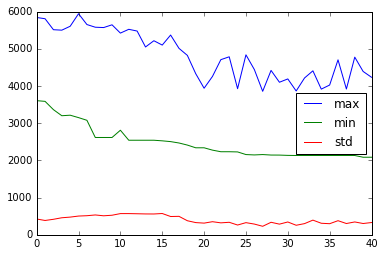

In [23]:
df.plot(y=['max','min','std'])

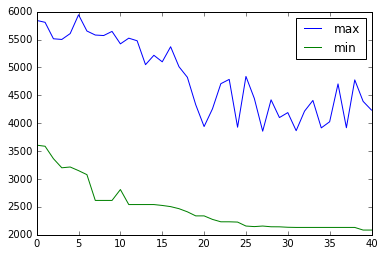

In [24]:
  df.plot(y=['max','min']) 

In [38]:
df

,avg,gen,max,min,nevals,std
0,4700.700000,0,5842.0,3606.0,300,424.385536
1,4463.740000,1,5808.0,3587.0,217,385.242935
2,4364.210000,2,5513.0,3364.0,225,416.823055
3,4285.670000,3,5501.0,3201.0,223,458.048048
4,4206.016667,4,5606.0,3215.0,223,475.679251
5,4146.416667,5,5943.0,3150.0,230,504.014923
6,4123.213333,6,5652.0,3078.0,247,513.324921
7,4081.346667,7,5580.0,2616.0,231,533.340685
8,4027.113333,8,5571.0,2616.0,232,510.979902
9,3978.780000,9,5645.0,2616.0,214,525.990378


In [71]:
newdf = pd.DataFrame()
newdf['min']=df['min']

In [69]:
newdf.insert?

In [39]:
difference = df['max','min'].apply(np.diff)

KeyError: ('max', 'min')